<a href="https://colab.research.google.com/github/Barbhuiya12/Hydrology-/blob/main/Autocorelation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Autocorrelation** 
Correlation generally determines the relationship between two variables. Correlation is calculated between the variable and itself at previous time steps, such a correlation is called Autocorrelation.

In [30]:
# import modules
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf

**Method 1 : Using lagplot()**

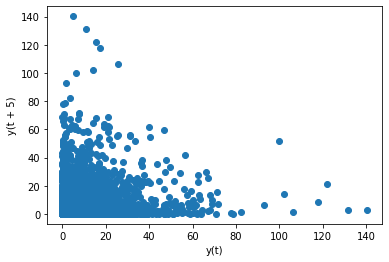

In [31]:
# read the data from the csv
data = pd.read_csv("AutoC_1.csv",
                   header=0, index_col=0, parse_dates=True,
                   squeeze=True)
 
# display top 15 data
data.head(15)
 
# lagplot
pd.plotting.lag_plot(data, lag=5)

**Method 2: Creating lagged variables at different time steps**

In [32]:
data = pd.read_csv("AutoC_1.csv",
                   header=0, index_col=0, parse_dates=True,
                   squeeze=True)
 
# extracting only the temperature values
values = pd.DataFrame(data.values)
 
# using shift function to shift the values.
dataframe = pd.concat([values.shift(4),values.shift(3), values.shift(2),
                       values.shift(1), values], axis=1)
# naming the columns
dataframe.columns = ['t', 't+1', 't+2', 't+3','t+4']
 
# using corr() function to compute the correlation
result = dataframe.corr()
print(result)


            t       t+1       t+2       t+3       t+4
t    1.000000  0.608912  0.387730  0.315206  0.284842
t+1  0.608912  1.000000  0.608917  0.387737  0.315214
t+2  0.387730  0.608917  1.000000  0.608921  0.387744
t+3  0.315206  0.387737  0.608921  1.000000  0.608926
t+4  0.284842  0.315214  0.387744  0.608926  1.000000


The way to interpret the output is as follows:



1. The autocorrelation at lag 0 is 1.
2. The autocorrelation at lag 1 is 0.0.60.
3. The autocorrelation at lag 2 is 0.3877.
4. The autocorrelation at lag 3 is 0.314.





**Method 3: Using plot_acf()**

Plot in between ACF vs Days 

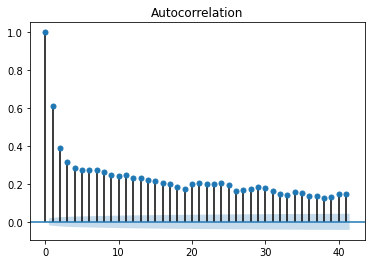

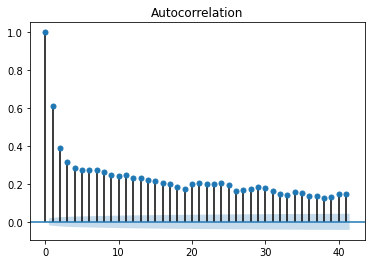

In [33]:
# read the csv data
data = pd.read_csv("AutoC_1.csv",
                   header=0, index_col=0, parse_dates=True,
                   squeeze=True)
 
# plot the auto correlation
plot_acf(data)
